<a href="https://colab.research.google.com/github/bigflyy/DeepLearningWithPython/blob/main/4NewsWiresMultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [36]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters


In [37]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [38]:
train_labels[0]

np.int64(3)

In [39]:
word_index = reuters.get_word_index()

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_newswire = " ".join(
[reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [40]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [41]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

In [42]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [43]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results


In [44]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])

In [46]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [47]:
x_val = x_train[:1000]
y_val = y_train[:1000]
partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

In [48]:
display(len(x_val), len(y_val), len(partial_x_train), len(partial_y_train))

1000

1000

7982

7982

In [49]:
display(x_val.shape, y_val.shape, partial_x_train.shape, partial_y_train.shape)

(1000, 10000)

(1000, 46)

(7982, 10000)

(7982, 46)

In [50]:
print(partial_x_train.dtype, partial_y_train.dtype)
print(x_val.dtype, y_val.dtype)

float64 float64
float64 float64


In [51]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.3988 - loss: 3.2438 - val_accuracy: 0.6220 - val_loss: 1.8668
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6693 - loss: 1.6745 - val_accuracy: 0.6990 - val_loss: 1.3962
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7267 - loss: 1.2765 - val_accuracy: 0.7270 - val_loss: 1.2231
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7765 - loss: 1.0390 - val_accuracy: 0.7610 - val_loss: 1.1033
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8154 - loss: 0.8527 - val_accuracy: 0.7830 - val_loss: 1.0257
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8475 - loss: 0.7116 - val_accuracy: 0.7910 - val_loss: 0.9708
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8717 - loss: 0.6174 - val_accuracy: 0.7880 - val_loss: 0.9392
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8959 - loss: 0.4930 - val_accuracy: 0.8100 - 

In [52]:
history = history.history

In [55]:
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [56]:
training_loss = history['loss']
val_loss = history['val_loss']


In [59]:
epochs = range(1, len(val_loss)+1)

[]

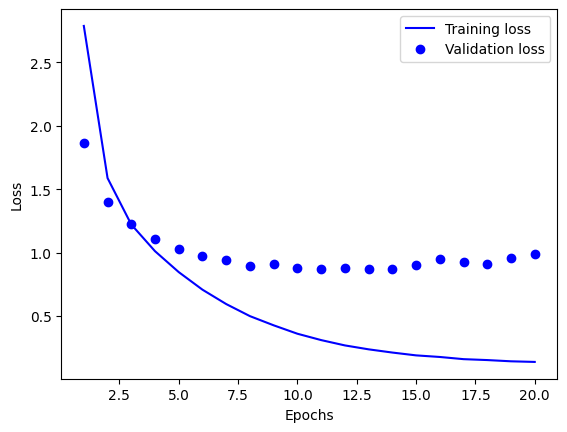

In [61]:
plt.plot(epochs, training_loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "bo", label = "Validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot()

In [62]:
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])

In [63]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [64]:
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.3534 - loss: 3.1631 - val_accuracy: 0.6340 - val_loss: 1.8281
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6729 - loss: 1.6429 - val_accuracy: 0.6900 - val_loss: 1.3830
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7407 - loss: 1.2204 - val_accuracy: 0.7400 - val_loss: 1.2068
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7851 - loss: 0.9953 - val_accuracy: 0.7570 - val_loss: 1.1103
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8226 - loss: 0.8363 - val_accuracy: 0.7790 - val_loss: 1.0234
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8466 - loss: 0.7094 - val_accuracy: 0.8020 - val_loss: 0.9707
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8748 - loss: 0.6040 - val_accuracy: 0.8060 - val_loss: 0.9277
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8997 - loss: 0.4862 - val_accuracy: 0.7970 - val_loss

In [66]:
results = model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7915 - loss: 0.9336


In [67]:
model.evaluate()

[0.957007884979248, 0.7853962779045105]

In [68]:
model.metrics_names

['loss', 'compile_metrics']

In [70]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [72]:
np.argmax(predictions[0])

np.int64(3)

In [73]:
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)
display(results)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.2882 - loss: 3.3715 - val_accuracy: 0.5600 - val_loss: 1.8898
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6187 - loss: 1.7287 - val_accuracy: 0.6520 - val_loss: 1.4563
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7077 - loss: 1.2837 - val_accuracy: 0.7100 - val_loss: 1.2365
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7657 - loss: 1.0357 - val_accuracy: 0.7470 - val_loss: 1.1136
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8168 - loss: 0.8209 - val_accuracy: 0.7640 - val_loss: 1.0214
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8451 - loss: 0.6691 - val_accuracy: 0.7870 - val_loss: 0.9710
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8731 - loss: 0.5647 - val_accuracy: 0.8060 - val_loss: 0.9196
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8944 - loss: 0.4582 - val_accuracy: 0.7920 - val_loss

[1.0186891555786133, 0.7818343639373779]

In [74]:
model = keras.Sequential([
layers.Dense(256, activation="relu"),
layers.Dense(128, activation="relu"),
layers.Dense(128, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)
display(results)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.3552 - loss: 2.9073 - val_accuracy: 0.6210 - val_loss: 1.5972
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6587 - loss: 1.4697 - val_accuracy: 0.7080 - val_loss: 1.2971
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7471 - loss: 1.0874 - val_accuracy: 0.7230 - val_loss: 1.1201
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8091 - loss: 0.8400 - val_accuracy: 0.7830 - val_loss: 0.9972
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8590 - loss: 0.6272 - val_accuracy: 0.7940 - val_loss: 0.9693
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8831 - loss: 0.5266 - val_accuracy: 0.7910 - val_loss: 0.9471
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9259 - loss: 0.3647 - val_accuracy: 0.7770 - val_loss: 1.0914
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9242 - loss: 0.3452 - val_accuracy: 0.7710 - val_loss

[1.1465489864349365, 0.7658059000968933]

In [75]:
model = keras.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(128, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)
display(results)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.4439 - loss: 2.6768 - val_accuracy: 0.7060 - val_loss: 1.3161
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7263 - loss: 1.1862 - val_accuracy: 0.7570 - val_loss: 1.0790
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8111 - loss: 0.8298 - val_accuracy: 0.7940 - val_loss: 0.9833
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8732 - loss: 0.5846 - val_accuracy: 0.8000 - val_loss: 0.8750
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9027 - loss: 0.4337 - val_accuracy: 0.7980 - val_loss: 0.8751
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9349 - loss: 0.3116 - val_accuracy: 0.8220 - val_loss: 0.7927
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9391 - loss: 0.2643 - val_accuracy: 0.8270 - val_loss: 0.8020
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9478 - loss: 0.2107 - val_accuracy: 0.7840 - val_loss

[0.9914714694023132, 0.7951914668083191]

In [76]:
model = keras.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(512, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)
display(results)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.4331 - loss: 2.5610 - val_accuracy: 0.6830 - val_loss: 1.3484
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7163 - loss: 1.1945 - val_accuracy: 0.7570 - val_loss: 1.0815
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8081 - loss: 0.8177 - val_accuracy: 0.7910 - val_loss: 0.9300
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8649 - loss: 0.5811 - val_accuracy: 0.8130 - val_loss: 0.8834
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9087 - loss: 0.3925 - val_accuracy: 0.8100 - val_loss: 0.8727
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9341 - loss: 0.2756 - val_accuracy: 0.8240 - val_loss: 0.8320
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9471 - loss: 0.2106 - val_accuracy: 0.8200 - val_loss: 0.8493
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9452 - loss: 0.2113 - val_accuracy: 0.8220 - val_loss

[0.9445421695709229, 0.8027604818344116]

In [77]:
model = keras.Sequential([
layers.Dense(1024, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)
display(results)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.4738 - loss: 2.3524 - val_accuracy: 0.7250 - val_loss: 1.1852
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7779 - loss: 0.9663 - val_accuracy: 0.7910 - val_loss: 0.9470
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8567 - loss: 0.6699 - val_accuracy: 0.8080 - val_loss: 0.8612
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9050 - loss: 0.4578 - val_accuracy: 0.8310 - val_loss: 0.7879
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9210 - loss: 0.3741 - val_accuracy: 0.8260 - val_loss: 0.7965
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9339 - loss: 0.2918 - val_accuracy: 0.8150 - val_loss: 0.8029
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9439 - loss: 0.2412 - val_accuracy: 0.8100 - val_loss: 0.8258
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9506 - loss: 0.2026 - val_accuracy: 0.8100 - val_loss

[0.8708149790763855, 0.8005343079566956]

In [78]:
model = keras.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)
display(results)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.4622 - loss: 2.5377 - val_accuracy: 0.7120 - val_loss: 1.2609
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7737 - loss: 1.0624 - val_accuracy: 0.7750 - val_loss: 1.0125
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8470 - loss: 0.7251 - val_accuracy: 0.8090 - val_loss: 0.8776
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8907 - loss: 0.5357 - val_accuracy: 0.8250 - val_loss: 0.8417
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9120 - loss: 0.4323 - val_accuracy: 0.8190 - val_loss: 0.8059
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9328 - loss: 0.3233 - val_accuracy: 0.8220 - val_loss: 0.7988
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9439 - loss: 0.2654 - val_accuracy: 0.8320 - val_loss: 0.7921
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9490 - loss: 0.2185 - val_accuracy: 0.8010 - val_loss:

[0.9141849875450134, 0.7920747995376587]

In [79]:
model = keras.Sequential([
layers.Dense(2048, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)
display(results)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.4735 - loss: 2.2869 - val_accuracy: 0.7430 - val_loss: 1.1948
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7897 - loss: 0.9429 - val_accuracy: 0.7630 - val_loss: 1.0193
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8615 - loss: 0.6514 - val_accuracy: 0.8030 - val_loss: 0.9182
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8950 - loss: 0.4732 - val_accuracy: 0.8280 - val_loss: 0.7998
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9264 - loss: 0.3479 - val_accuracy: 0.8030 - val_loss: 0.8509
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9324 - loss: 0.2842 - val_accuracy: 0.8200 - val_loss: 0.7931
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9394 - loss: 0.2524 - val_accuracy: 0.8340 - val_loss: 0.7711
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9576 - loss: 0.1761 - val_accuracy: 0.8080 - val_loss

[0.9168574810028076, 0.8005343079566956]

In [80]:
model = keras.Sequential([
layers.Dense(2048, activation="relu"),
layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512, validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)
display(results)

Epoch 1/7
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.4684 - loss: 2.2987 - val_accuracy: 0.7530 - val_loss: 1.1497
Epoch 2/7
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7884 - loss: 0.9654 - val_accuracy: 0.7430 - val_loss: 1.0742
Epoch 3/7
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8451 - loss: 0.6724 - val_accuracy: 0.8130 - val_loss: 0.8445
Epoch 4/7
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9139 - loss: 0.4329 - val_accuracy: 0.8200 - val_loss: 0.8020
Epoch 5/7
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9205 - loss: 0.3613 - val_accuracy: 0.8210 - val_loss: 0.8300
Epoch 6/7
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9371 - loss: 0.2786 - val_accuracy: 0.8140 - val_loss: 0.8149
Epoch 7/7
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9438 - loss: 0.2357 - val_accuracy: 0.8170 - val_loss: 0.7851
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8064 - loss: 0.8510


[0.8609946966171265, 0.7943009734153748]